# Problem Statement

## Context

Investors face market risk, arising from asset price fluctuations due to economic events, geopolitical developments, and investor sentiment changes. Understanding and analyzing this risk is crucial for informed decision-making and optimizing investment strategies.

## Objective

The objective of this analysis is to conduct Market Risk Analysis on a portfolio of Indian stocks using Python. It uses historical stock price data to understand market volatility and riskiness. Using statistical measures like mean and standard deviation, investors gain a deeper understanding of individual stocks' performance and portfolio variability.

Through this analysis, investors can aim to achieve the following objectives:

1. Risk Assessment: Analyze historical volatility of individual stocks and the overall portfolio.
2. Portfolio Optimization: Use Market Risk Analysis insights to enhance risk-adjusted returns.
3. Performance Evaluation: Assess portfolio management strategies' effectiveness in mitigating market risk.
4. Portfolio Performance Monitoring: Monitor portfolio performance over time and adjust as market conditions and risk preferences change.

## Data Dictionary

The dataset contains weekly stock price data for 5 Indian stocks over an 8-year period. The dataset enables us to analyze the historical performance of individual stocks and the overall market dynamics.

# **Please read the instructions carefully before starting the project.**

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.

# Importing necessary Libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [2]:
df = pd.read_csv('/Users/ishashukla/Downloads/Market_Risk_Data.csv')  ##  Fill the blank to read the data
df.head()

,Date,Dish TV,Infosys,Hindustan Unilever,Vodafone Idea,Cipla
0,28-03-2016,86,608,867,67,514
1,04-04-2016,86,607,863,65,519
2,11-04-2016,85,583,853,66,506
3,18-04-2016,87,625,900,69,515
4,25-04-2016,89,606,880,71,532


# Overview of the Dataset

In [3]:
df.shape  ##  Complete the code to view dimensions of the data

(418, 6)

In [4]:
df.info()  ## Complete the code to view information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                418 non-null    object
 1   Dish TV             418 non-null    int64 
 2   Infosys             418 non-null    int64 
 3   Hindustan Unilever  418 non-null    int64 
 4   Vodafone Idea       418 non-null    int64 
 5   Cipla               418 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 19.7+ KB


In [5]:
df.describe().T  ##  Complete the code to print the statistical summary of the data

,count,mean,std,min,25%,50%,75%,max
Dish TV,418.0,38.648325,31.944620,4.0,14.00,19.5,73.0,108.0
Infosys,418.0,1007.210526,455.089501,445.0,591.25,777.5,1454.0,1939.0
Hindustan Unilever,418.0,1906.344498,597.800173,788.0,1368.50,2083.0,2419.0,2798.0
Vodafone Idea,418.0,23.234450,20.264854,3.0,9.00,12.0,43.0,71.0
Cipla,418.0,756.614833,252.969619,370.0,556.00,637.0,946.0,1493.0


In [7]:
df.isnull().sum() ## Complete the code to view number of null or NaN values in each column

Date                  0
Dish TV               0
Infosys               0
Hindustan Unilever    0
Vodafone Idea         0
Cipla                 0
dtype: int64

In [9]:
# Convert object to DateTime
df['Date']  = pd.to_datetime(df['Date'])  ## Complete the code to convert Date column from object to datetime
df.head()

,Date,Dish TV,Infosys,Hindustan Unilever,Vodafone Idea,Cipla
0,2016-03-28,86,608,867,67,514
1,2016-04-04,86,607,863,65,519
2,2016-04-11,85,583,853,66,506
3,2016-04-18,87,625,900,69,515
4,2016-04-25,89,606,880,71,532


# Stock Price Analysis

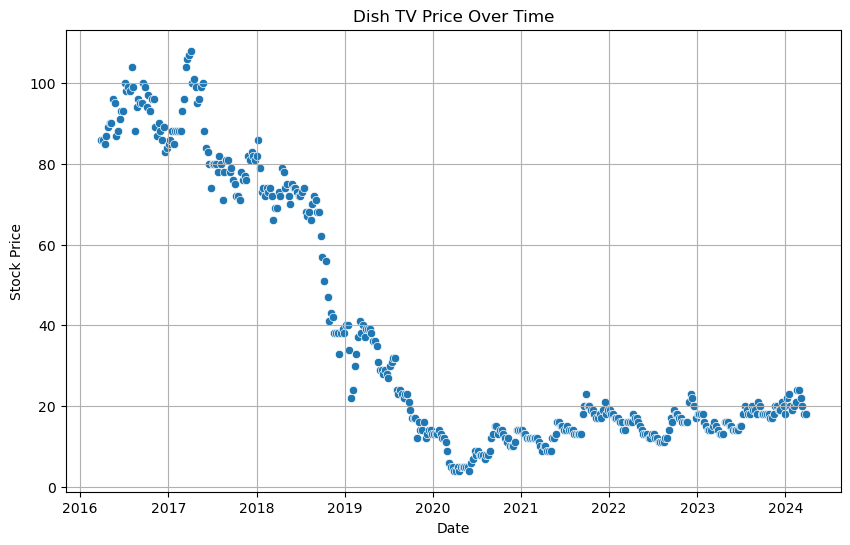

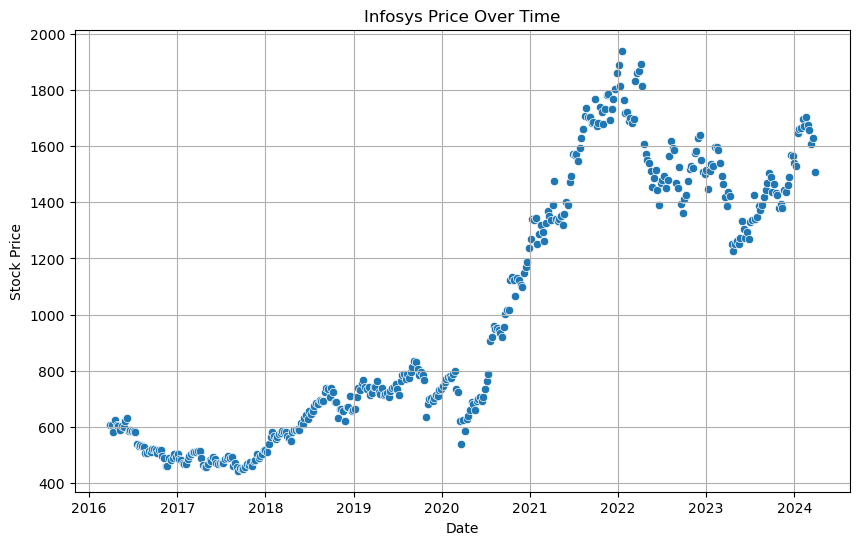

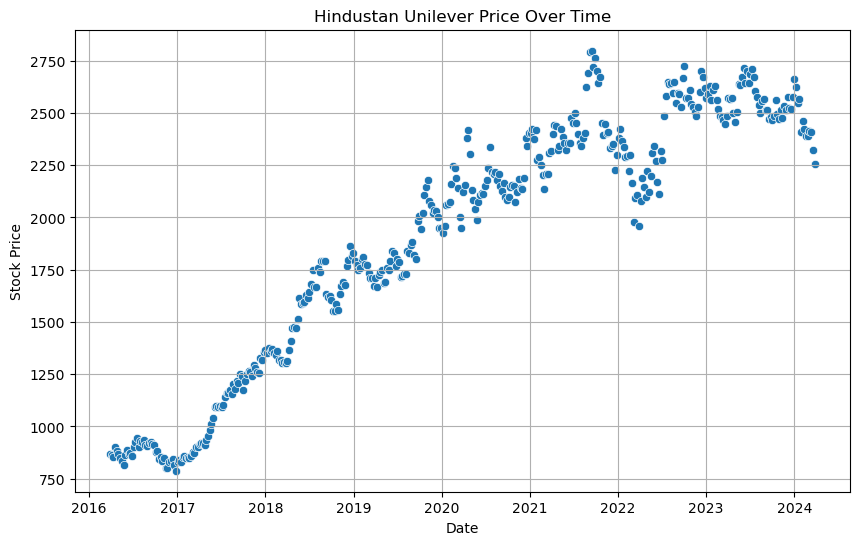

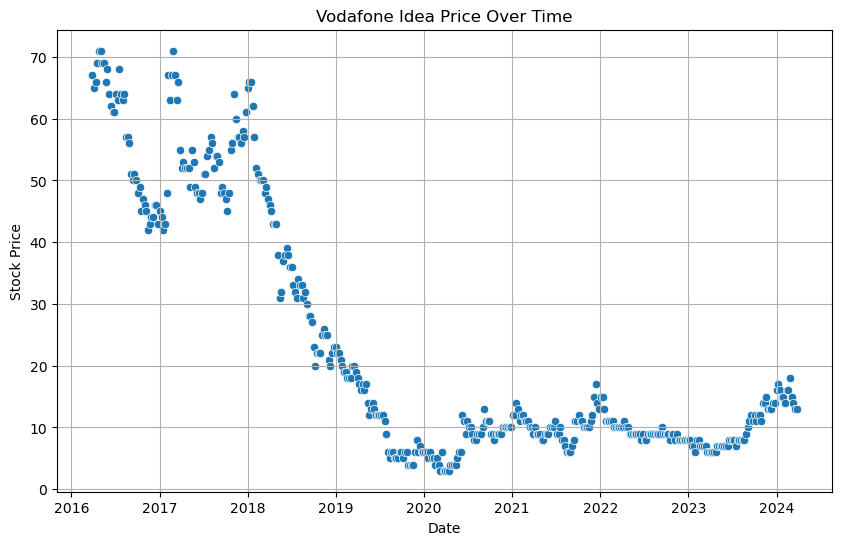

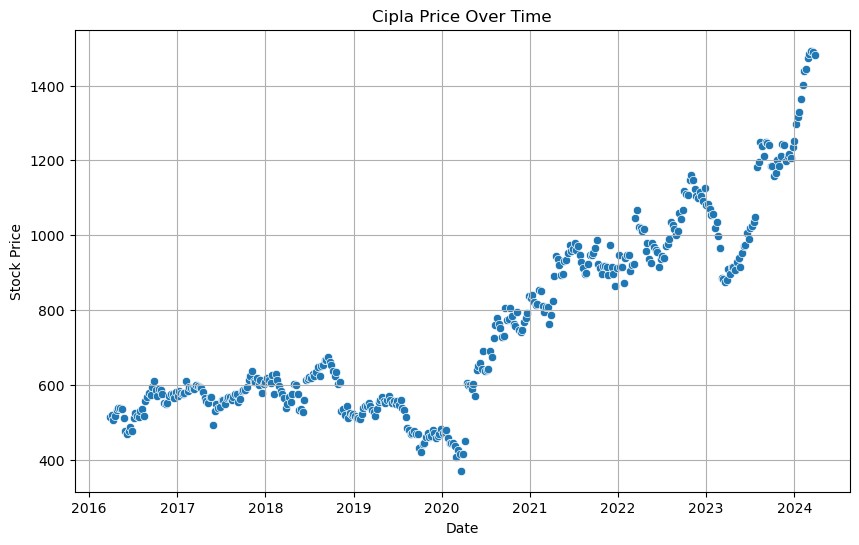

In [49]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()  ## Complete the code to get all the numerical columns in the data

for i, stock in enumerate (numeric_columns):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data = df, x='Date',y=stock)  ## Complete the code to plot a scatterplot for all the columns against Date
    plt.title(f'{stock} Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.grid(True)
    plt.show()

**Inference**
-


# Returns and Volatility Analysis


## Return Calculation

In [15]:
Return_of_Stocks =  np.log(df.drop(['Date'],axis=1)).diff(axis = 0)

# Set the display options to show all rows and columns
pd.set_option('display.max_rows', None)  # Set to None to display all rows

Return_of_Stocks

,Dish TV,Infosys,Hindustan Unilever,Vodafone Idea,Cipla
0,NaN,NaN,NaN,NaN,NaN
1,0.000000,-0.001646,-0.004624,-0.030305,0.009681
2,-0.011696,-0.040342,-0.011655,0.015267,-0.025367
3,0.023257,0.069564,0.053635,0.044452,0.017630
4,0.022728,-0.030872,-0.022473,0.028573,0.032477
5,0.011173,-0.001652,-0.014883,0.000000,0.009355
6,0.000000,-0.023412,-0.018627,-0.028573,0.001860
7,0.064539,0.023412,-0.021378,0.000000,-0.007463
8,-0.010471,-0.004971,-0.019395,-0.044452,-0.045985
9,-0.087969,0.031074,0.055934,0.029853,-0.066894


**Inference**
-


## Average Returns

In [16]:
StockMeans = Return_of_Stocks.mean()  ## Complete the code to get the mean for the returns for all stocks
StockMeans.sort_values()

Vodafone Idea        -0.003932
Dish TV              -0.003751
Infosys               0.002180
Hindustan Unilever    0.002294
Cipla                 0.002538
dtype: float64

**Inference**
-


## Volatility

In [17]:
StockStdDev = Return_of_Stocks.std()  ## Complete the code to get the std. deviation for the returns for all stocks
StockStdDev.sort_values()

Hindustan Unilever    0.028845
Infosys               0.036102
Cipla                 0.036759
Dish TV               0.091333
Vodafone Idea         0.113747
dtype: float64

**Inference**
-


## Visualizing Returns and Volatility

In [28]:
data = pd.DataFrame({
    'Mean': StockMeans,
    'Volatility': StockStdDev
})  ## Complete the code to get a dataframe for mean  and std. deviation for the returns of all stocks
data

,Mean,Volatility
Dish TV,-0.003751,0.091333
Infosys,0.002180,0.036102
Hindustan Unilever,0.002294,0.028845
Vodafone Idea,-0.003932,0.113747
Cipla,0.002538,0.036759


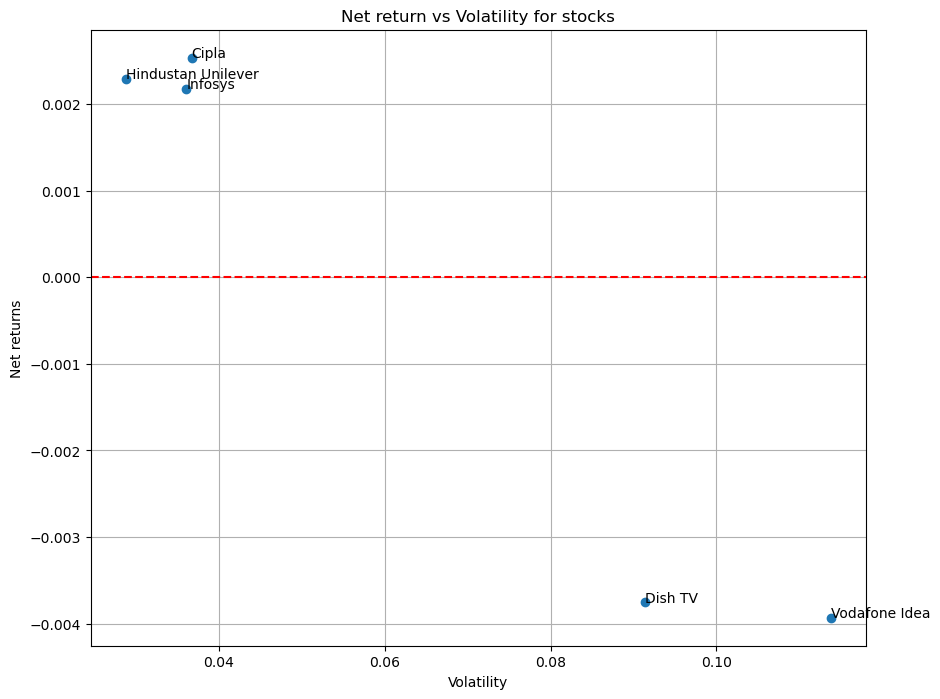

In [46]:
import seaborn as sns

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.scatter(x='Volatility', y='Mean',data=data)  ## Complete the code to get the plot of returns vs volatility for the returns for all stocks
plt.axhline(y=0,linestyle='--', color = "red")

for index, row in data.iterrows():
    ax.text(row['Volatility'], row['Mean'], index)
plt.xlabel('Volatility')
plt.ylabel('Net returns')
plt.title('Net return vs Volatility for stocks')
plt.grid()
plt.show()

The scatter plot titled “Net Return vs. Volatility for Stocks” illustrates the relationship between the volatility of various stocks and their net returns. The x-axis, labeled ‘Volatility,’ ranges from 0 to 0.10, while the y-axis, labeled ‘Net Return,’ spans from -0.004 to 0.002. The graph includes data points for companies such as Cipla, Hindustan Unilever, Infosys, Dish TV, and Vodafone Idea. A horizontal dashed red line crosses the y-axis slightly above the -0.001 mark, possibly indicating an average or specific value of interest in net return. The plot reveals that Cipla shows the highest net returns, followed by Hindustan Unilever and Infosys, while Dish TV has a negative return, and Vodafone Idea shows the most significant loss in net return. This visual representation is valuable for investors or financial analysts as it helps assess the risk versus reward of these stocks.

**Inference**
-


# Conclusions and Recommendations

*

___